In [12]:
import os
import numpy as np
from IPython.display import HTML
from PreProcessing_af import (parse_observations_af)
from PreProcessing_af import sonnet_parser_af

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    sample_sentence,
    visualize_sparsities,
    parse_observations,
    animate_emission, 
    obs_map_reverser
)
import matplotlib.pyplot as plt

In [2]:
# using HMM implementation from HW 6

### Data Processing Notes 
* lowercase all words
* split lines into lists (singular sequence as a line in the poem)
* remove / ignore punctuation 
* 

* try entire sonnet as a sequence. 

In [124]:
# text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()

In [125]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare_af.txt')).read()

In [4]:
# using Alex's parser, turns sonnets into sequences and eliminates sonnet numbers
obs_sonnet, obs_map_sonnet = sonnet_parser_af(text)

In [5]:
obs = obs_sonnet
obs_map = obs_map_sonnet

In [15]:
# # read in (but includes numbers)
# obs, obs_map = parse_observations(text)

In [16]:
# # read in text, excluding sonnet numbers from obs and obs map
# obs, obs_map = parse_observations_af(text)

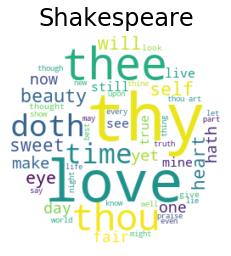

In [17]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [18]:
# 10 states, 100 iterations 

In [19]:
# hmm10 = unsupervised_HMM(obs, 10, 1)

In [20]:
# print('Sample Sentence:\n====================')
# print(sample_sentence(hmm10, obs_map, n_words=25))

In [21]:
# print sample poem 

In [22]:
# # trying again moving sonnet update line up

# # works if numbers not removed 
# # turn lines = sequences -> sonnet=sequeces 

# sonnets = [] # initialize list for containing all sonnet sequences
# current_sonnet = [] 

# for line in obs:
#     if len(line)==1: # beginning of a sonnet (number)
#         sonnets.append(current_sonnet)
#         sonnets.append(line) # new obs for each number (to match obs map)
#         current_sonnet = [] # initialize new empty list for new sonnet sequence
#         pass
    
#     elif len(line)!=1:
#         current_sonnet.extend(line) # add new line to sonnet
# #     sonnets.append(current_sonnet) # add previous sonnet to list of all sonnet sequences
     
# sonnets = sonnets[1:]

In [23]:
# def turn_obs_sonnets_w_num(obs):
#     sonnets = [] # initialize list for containing all sonnet sequences
#     current_sonnet = [] 

#     for line in obs:
#         if len(line)==1: # beginning of a sonnet (number)
#             sonnets.append(current_sonnet)
#             sonnets.append(line) # new obs for each number (to match obs map)
#             current_sonnet = [] # initialize new empty list for new sonnet sequence
#             pass

#         elif len(line)!=1:
#             current_sonnet.extend(line) # add new line to sonnet

#     sonnets = sonnets[1:]
#     return sonnets

In [24]:
# # if numbers removed 

# sonnets = [] # initialize list for containing all sonnet sequences
# current_sonnet = [] 
# counter = 0 

# for line in obs:
#     if counter<14:
#         current_sonnet.extend(line) # add new line to sonnet
#         counter += 1
#     elif counter==14:
#         sonnets.append(current_sonnet) # add previous sonnet to list of all sonnet sequences
#         counter=0 # reset counter
#         current_sonnet=[]
#         current_sonnet.extend(line)
        

In [28]:
#print('Sample Sentence:\n====================')
#print(sample_sentence(hmm11, obs_map, n_words=25))

In [6]:
# mean number of words/ sonnet 
sonnets = obs_sonnet

mean_word_array = np.full(len(sonnets), np.nan)
for i in range(len(sonnets)):
    mean_word_array[i] = len(sonnets[i])
    
print(np.mean(mean_word_array))

111.42207792207792


Make each sonnet 108 divided by 14 lines

In [7]:
def sample_sonnet(hmm, obs_map, n_words=112):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    
    emission, states = hmm.generate_emission(n_words)
    
    line_iter = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112]
    
    for i in range(len(line_iter[:-1])):
        
        stanza_num = emission[line_iter[i]:line_iter[i+1]]
        stanza_word = [obs_map_r[k] for k in stanza_num]
        print(' '.join(stanza_word))
    


#     return ' '.join(sentence).capitalize() + '...'

In [31]:
# sample_sonnet(hmm11, obs_map, n_words=112)

In [32]:
# sample_sonnet(hmm11, obs_map, n_words=112)

In [33]:
# hmm10_10 = unsupervised_HMM(sonnets, 10, 10)
# sample_sonnet(hmm10_10, obs_map, n_words=112)

In [34]:
# hmm_by_sonnet = unsupervised_HMM(obs_sonnet, 5, 1)
# sample_sonnet(hmm_by_sonnet, obs_map_sonnet, n_words=112)
# states_to_wordclouds(hmm_by_sonnet, obs_map_sonnet);

## this is the output we are interested in 

Sample Sonnet with 1 hidden state and 1 iteration:
did hue off the of your barren bare
thy and when wrongs present me expired back
to thou the being should forth him own
learn new knows minion disgrace from since thou
faults self thou grief but expiate me your
the made are you be hot to keepst
bear womb so lips gaze express if vowing
is can hap any be to more heart
excess thou most art and is thou me
sessions might alone so puts to away you
to not since lest for who winters heat
when quicker hate to in i was in
on of false youths perceive simple maiden and
self but fortunes have but from assemble worths


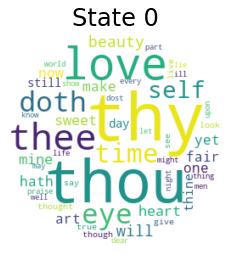

In [35]:
# one state one iteration 

hmm_one_one = unsupervised_HMM(obs_sonnet, 1, 1)
print('Sample Sonnet with 1 hidden state and 1 iteration:\n====================')
sample_sonnet(hmm_one_one, obs_map_sonnet, n_words=112)
states_to_wordclouds(hmm_one_one, obs_map_sonnet)

Sample Sonnet with 10 hidden states with1 iterations:
is many wake forth in and to i
heaven memory o that their too a steel
their wrong blood may masonry blushing hast lie
mend souls offend receives two there beautys deeds
my one shall in him my the how
love compound you cold if for much with
ill pleasures that every self do things black
from what every is doth pride i as
eye thy deceive what spite to if the
beloved self my away since spirits be unbred
woe when the gazed are with kind face
but pyramids best the thy love thou spend
in well you the silence her eye speak
pluck the hold i making woe ere by


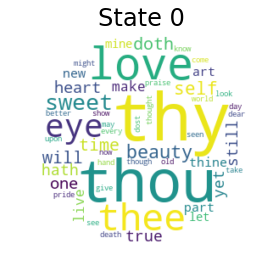

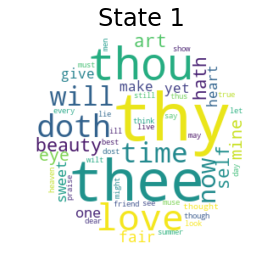

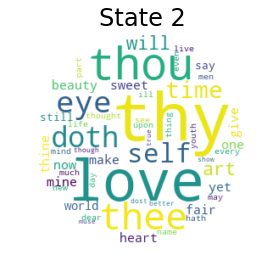

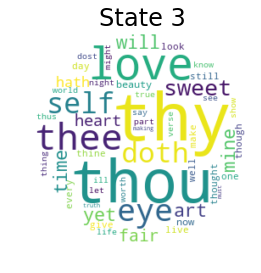

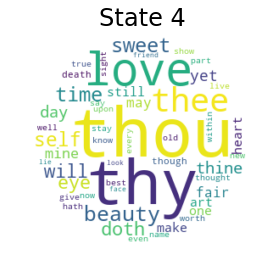

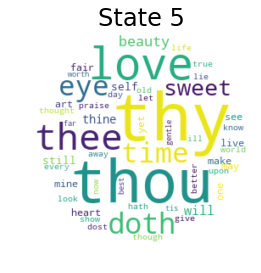

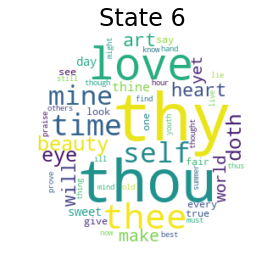

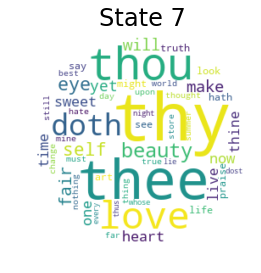

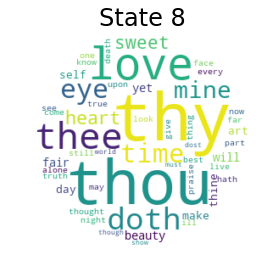

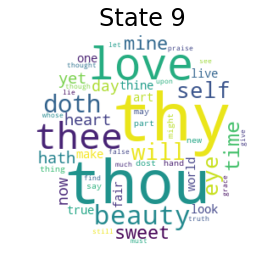

Sample Sonnet with 10 hidden states with5 iterations:
but beyond is that beauty you hide to
posterity not me with tis so but do
the the our i love self be strong
needs a of place thou flow an bear
thou or the of wound gentle thou can
one be things me thou but and and
light but your truly the cause with receives
and against for teachest i friend i but
might sail the this with all in for
mightst live 149 was deaths her kings lost
poor what thy love by jealous injurious it
thou disease birth doth that she water antique
i by thine thee life lust their he
taught extreme as use comment fearing aside home


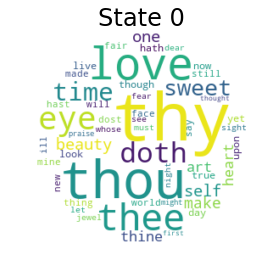

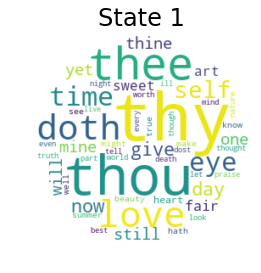

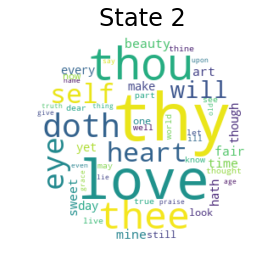

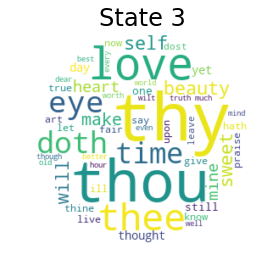

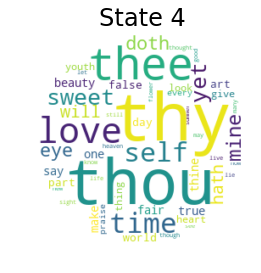

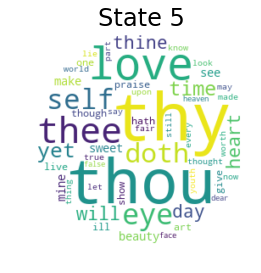

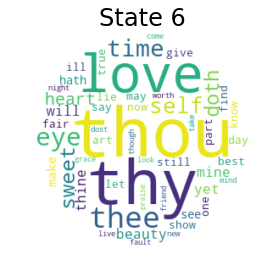

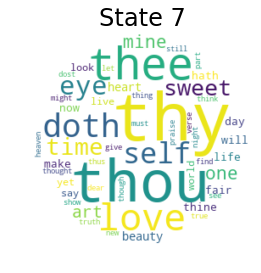

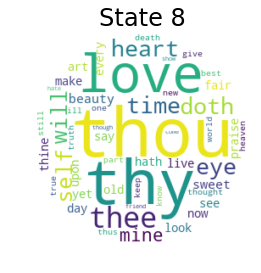

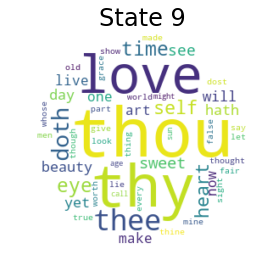

Sample Sonnet with 10 hidden states with10 iterations:
art shape heard my survive which bark my
thee it of time youth what with every
doth shall you wherefore dial that shamefully than
a an days on as flatter dead and
field to be lies such face other a
is lions to but which your which and
the rain praise or to poor of art
believe alchemy should soul minds and in delayed
clouds not eyes stealth of themselves sweet of
as than and seasons gusts my you when
part but richer and thou their there winter
alive beauty him thou thy kill all love
them take altered fleece foiled mind be love
be kingdoms in shifts your verse he they


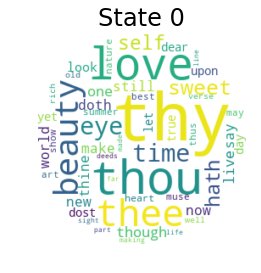

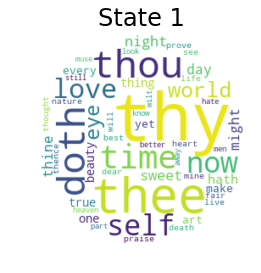

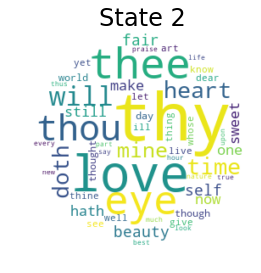

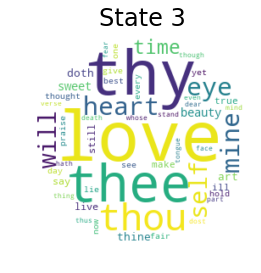

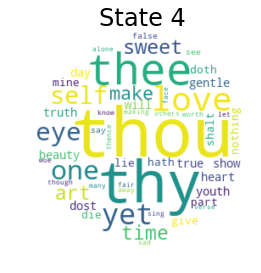

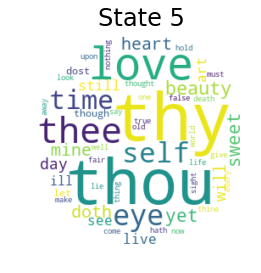

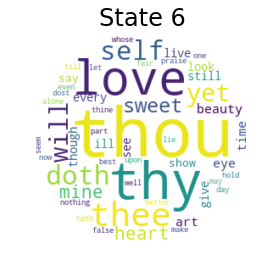

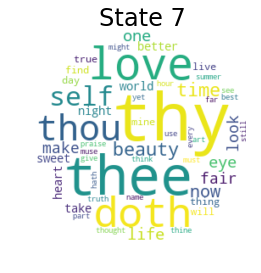

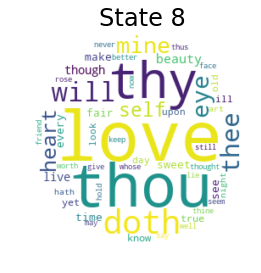

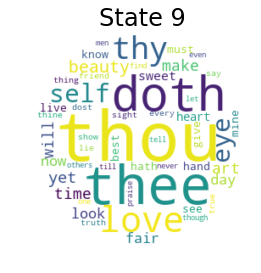

Sample Sonnet with 10 hidden states with20 iterations:
i my shall when a thou shalt both
my choirs confess say the for mother as
nature what my and slave survive barren or
die then prove your can sweet breast two
but with fear makes five check place child
although and him in up them a gaze
have increase sweet speak he i the for
thou whose since friend of forsworn i merchandized
forget tickled of o as saw deaths heart
which the all i count which loves than
glass then the mortal and undivided thou dare
this my franticmad true which too ride free
manners so be to in filled you churls
the doth mutual is heat see buried him


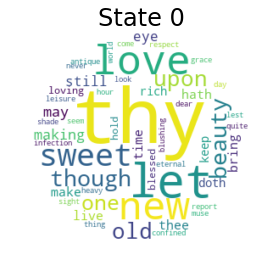

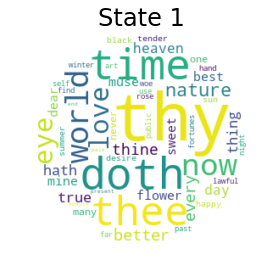

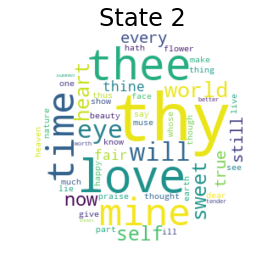

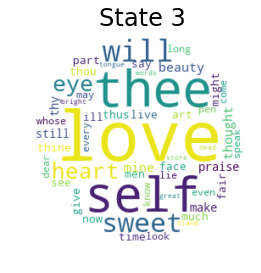

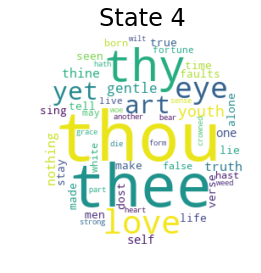

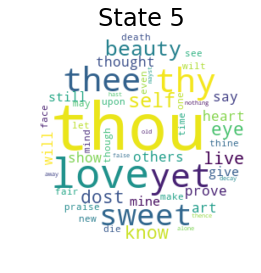

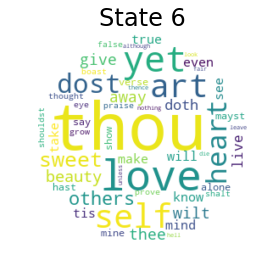

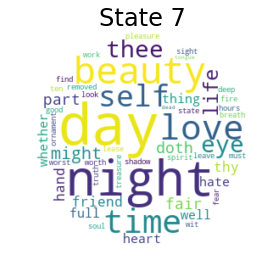

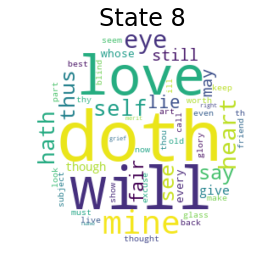

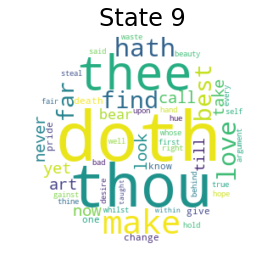

In [10]:
# looping through various number of iterations with 10 states
iteration_num = [1, 5, 10, 20]

for i in iteration_num:
    hmm = unsupervised_HMM(obs_sonnet, 10, i)
    
    print('Sample Sonnet with 10 hidden states with' + str(i) + ' iterations:\n====================')
    sample_sonnet(hmm, obs_map_sonnet, n_words=112)
    states_to_wordclouds(hmm, obs_map_sonnet)

Sample Sonnet with 5 hidden states with 10 iterations:
their sense hand of air be a hearts
that unthrifts no my dost not strumpeted sorrows
is have of newer the sun intelligence and
by can time more of perfect of self
a my kindness hymns fade love how him
that the knows teach in had thou to
gravity frailties put for mine say say since
corrupt your they i hymns their own like
thee upon seen luck shalt to what and
in although of repent the stand wilt five
dust pace aught the chance thou acquaintance and
whether sick oaths crystal resty this did when
twixt whose crowned and tears house limping thou
their thine now his death and of in


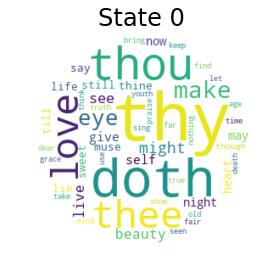

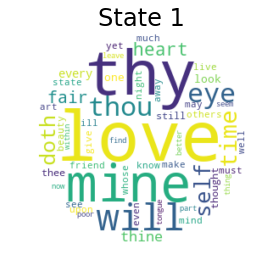

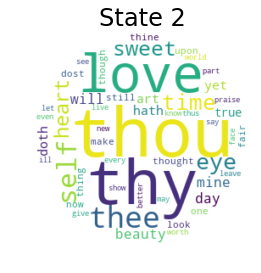

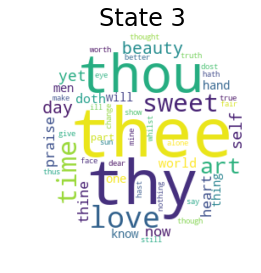

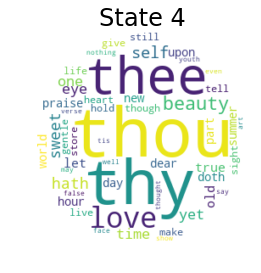

Sample Sonnet with 10 hidden states with 10 iterations:
when precious thy sullied thee for i impression
my hate on teach that compare in year
my conceit dost tallies onward your against slanders
my thee watery and potions holy where hast
with be bath live enough accumulate charged pitywanting
all knit heart which stay last work kept
gone and to mine pleasure thy many be
disposed seeting image without petty memory it good
fears a height who twixt hath guard often
with no with truly farther on part for
sea that defaced my heart cools incertainty scythe
but must how beautys this march will amen
of their have foul in my possession can
is life writ sweet i have and because


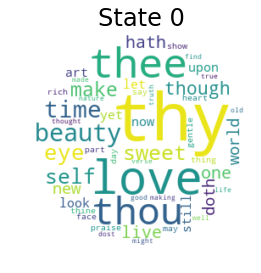

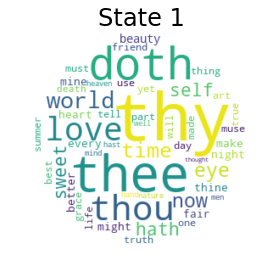

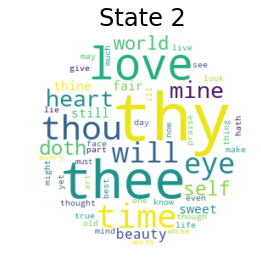

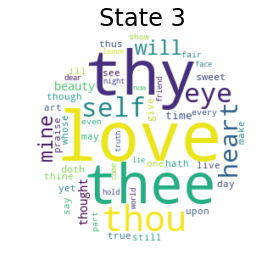

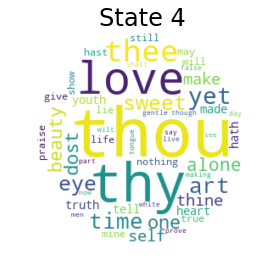

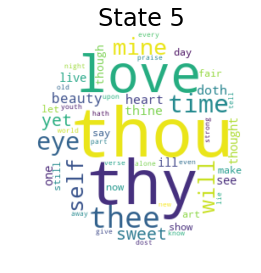

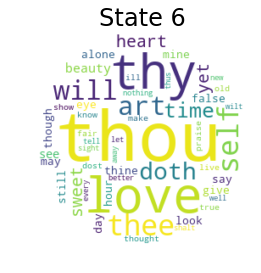

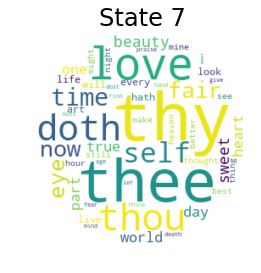

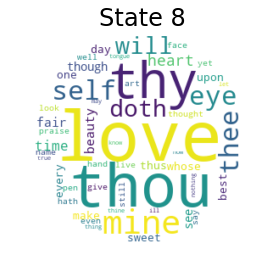

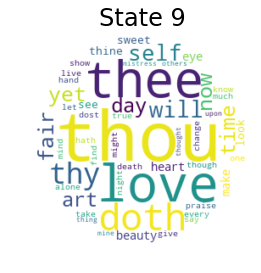

Sample Sonnet with 20 hidden states with 10 iterations:
thee set no have wellseeing blesses hand from
my me the lust being be scope convert
strong you dulness name much wishing gainst tongue
art my leave thee to wolf lovesuit and
singleness my sun serving hast should 125 pleasing
seem lame to great his limits worst more
departest a know clock do can in remembered
unless purple mourn beauty fiend should angel white
make store thus always although the time me
my thy call your nor habitation pilgrimage elsewhere
but did your thou society to for of
to prevailed i so as in them thou
and heavily with chary thus betraying spirit thy
white tonguetied pace onset the in to you


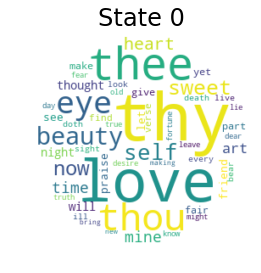

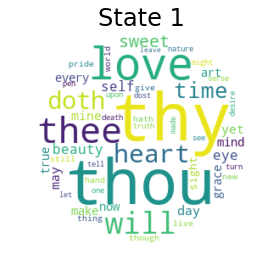

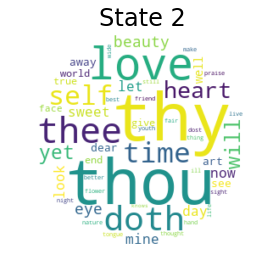

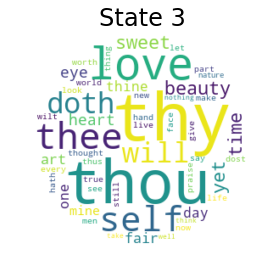

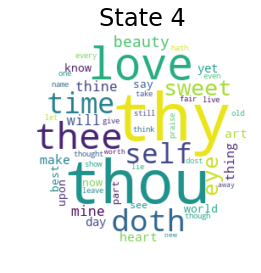

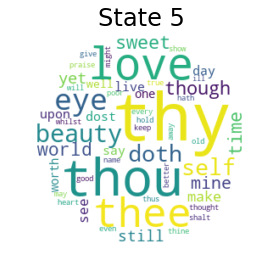

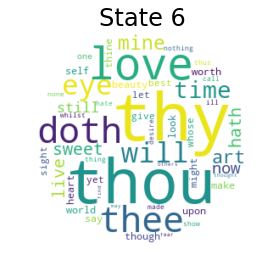

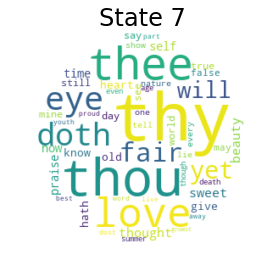

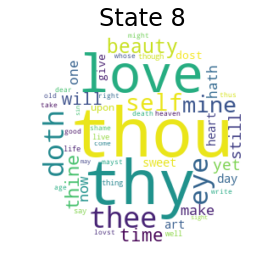

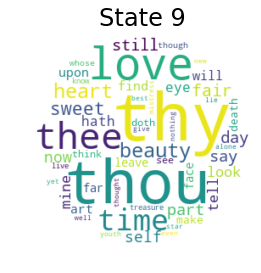

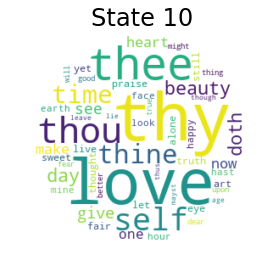

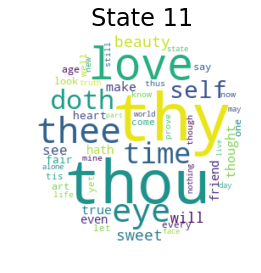

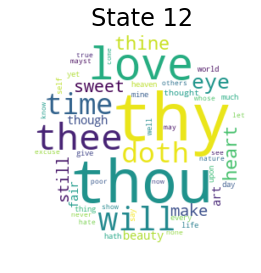

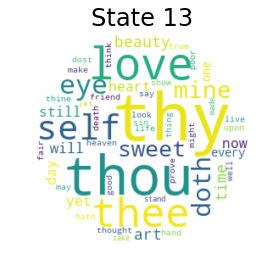

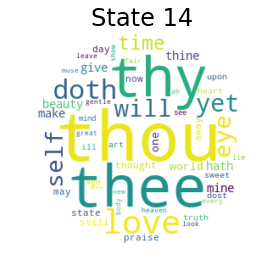

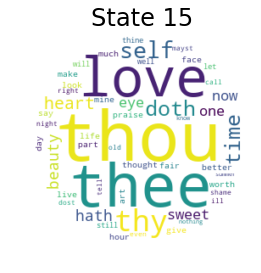

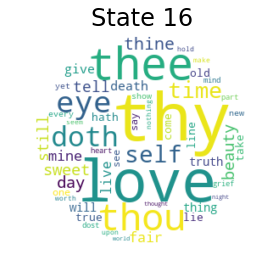

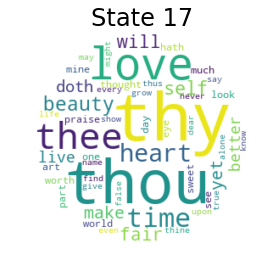

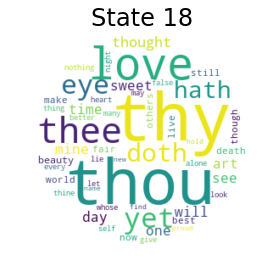

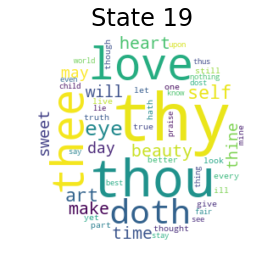

In [20]:
# looping through various number of states with 10 iterations 

state_num = [5, 10, 20]

for i in state_num:
    hmm = unsupervised_HMM(obs_sonnet, i, 10)
    
    print('Sample Sonnet with ' + str(i) + ' hidden states with 10 iterations:\n====================')
    sample_sonnet(hmm, obs_map_sonnet, n_words=112)
    states_to_wordclouds(hmm, obs_map_sonnet)

### for visualization of A and O

In [8]:
hmm = unsupervised_HMM(obs_sonnet, 10, 10)
    
print('Sample Sonnet with 10 hidden states with 10 iterations:\n====================')
sample_sonnet(hmm, obs_map_sonnet, n_words=112)

Sample Sonnet with 10 hidden states with 10 iterations:
far knows bareness as were rich she rose
zealous they look love of love cost skill
best expressed bright pale green mightier of most
may on my in not hot grow of
such should adders with so thy and is
thou knows still show in gavst youth to
less your gone hath than old or and
upon with passed love sight all thy days
thy yet rarities for mine a hath still
serving flatterer to oer and make even you
words a selflove thou music doth sense o
celestial controlling being of soul i thy i
me dead my than or well a rich
enjoy more looks yet make and nights be


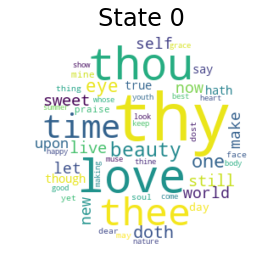

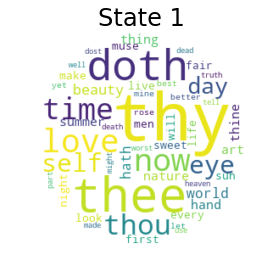

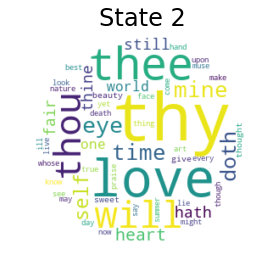

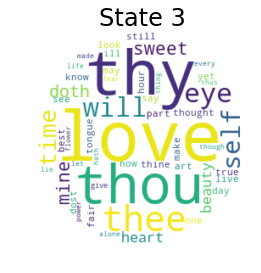

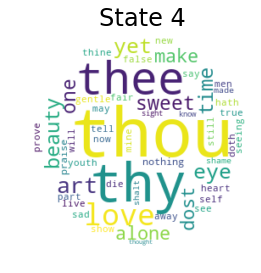

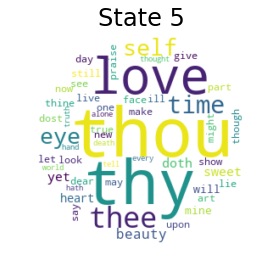

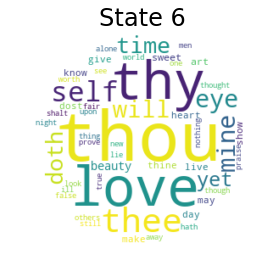

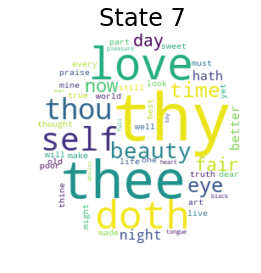

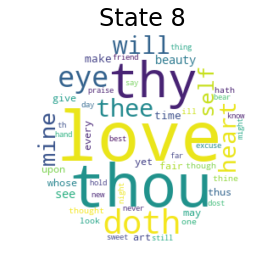

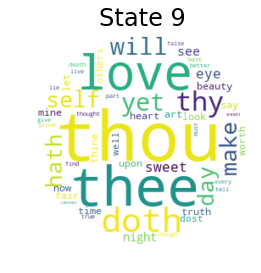

In [55]:
states_to_wordclouds(hmm, obs_map_sonnet)

In [17]:
state_list = ['state 0', 'state 1', 'state 2', 'state 3', 'state 4', 'state 5', 'state 6', 'state 7', 'state 8', 'state 9']
state_list

['state 0',
 'state 1',
 'state 2',
 'state 3',
 'state 4',
 'state 5',
 'state 6',
 'state 7',
 'state 8',
 'state 9']

### Transition matrix 

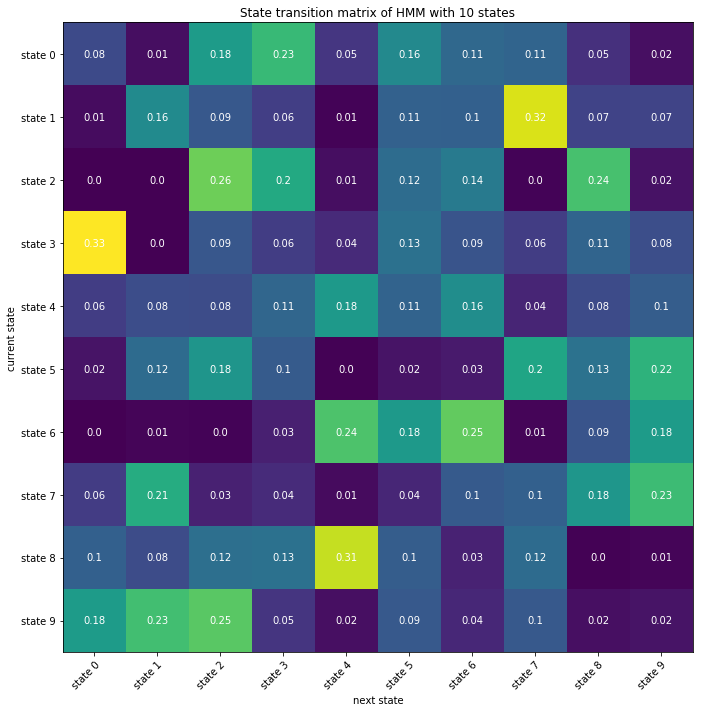

In [43]:
A = hmm.A

fig, ax = plt.subplots(figsize=(20,10))
# plt.figure(figsize=(30,10));
im = ax.imshow(A)

ax.set_xticks(np.arange(np.shape(A)[0]))
ax.set_yticks(np.arange(np.shape(A)[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(state_list)
ax.set_yticklabels(state_list)
ax.set_ylabel('current state')
ax.set_xlabel('next state')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
        text = ax.text(j, i, round(A[i][j], 2),
                       ha="center", va="center", color="w")

ax.set_title("State transition matrix of HMM with 10 states");
fig.tight_layout();
plt.show();

In [52]:
word_key = list(obs_map_sonnet.keys())

### Observation matrix 

In [103]:
O = np.array(hmm.O)

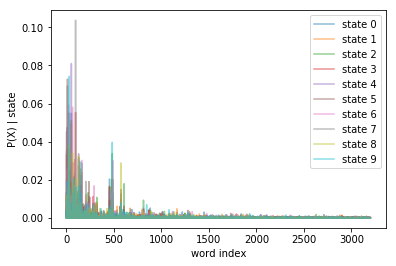

In [110]:
for i in range(np.shape(O)[0]):
    plt.plot(O[i][:], label=('state ' + str(i)), alpha=0.5);
    plt.legend()
    plt.ylabel('P(X) | state')
    plt.xlabel('word index')

In [115]:
def visualize_A(A):

    fig, ax = plt.subplots(figsize=(20,10))
    # plt.figure(figsize=(30,10));
    im = ax.imshow(A)

    ax.set_xticks(np.arange(np.shape(A)[0]))
    ax.set_yticks(np.arange(np.shape(A)[1]))
    # ... and label them with the respective list entries
    ax.set_xticklabels(state_list)
    ax.set_yticklabels(state_list)
    ax.set_ylabel('current state')
    ax.set_xlabel('next state')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            text = ax.text(j, i, round(A[i][j], 2),
                           ha="center", va="center", color="w")

    ax.set_title("State transition matrix of HMM with 10 states");
    fig.tight_layout();
    plt.show();

In [117]:
def visualize_O(O):
    O = np.array(O)
    for i in range(np.shape(O)[0]):
        plt.plot(O[i][:], label=('state ' + str(i)), alpha=0.5);
        plt.legend()
        plt.ylabel('P(X) | state')
        plt.xlabel('word index')

In [ ]:
# makes sense, later words less frequently used 

In [112]:
# rerun more iterations 

hmm_50 = unsupervised_HMM(obs_sonnet, 10, 50)

In [114]:
print('Sample Sonnet with 10 hidden states with 50 iterations:\n====================')
sample_sonnet(hmm_50, obs_map_sonnet, n_words=112)

Sample Sonnet with 10 hidden states with 50 iterations:
their that birth deemed lesson and to prove
place grave gift and is love but virtuous
make my and jacks mans gives for in
although annexed spirits not cheeks that o praise
own have i them both ill where a
helens than thy more poor of goes before
fed physicians gladly adieu feeds of all painting
salutation would compared for my thoughts boundless words
how virtue and his some on thy all
to gainst when of which for such self
yet nine taker spirit on you posterity others
breed to but ever be churl beautys therefore
prove be be like of vowed i thus
sweet forth added gems where mine days young


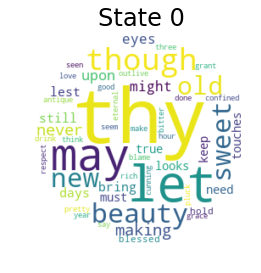

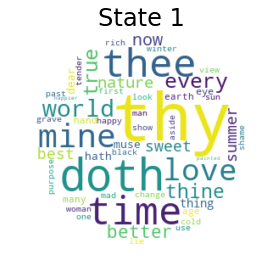

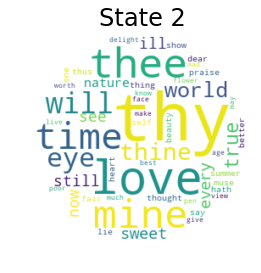

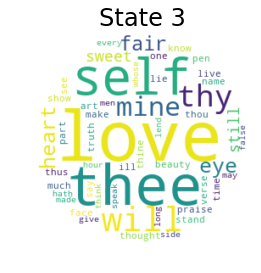

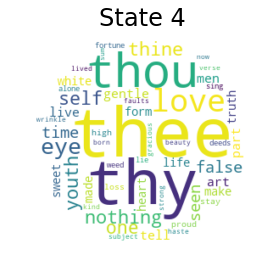

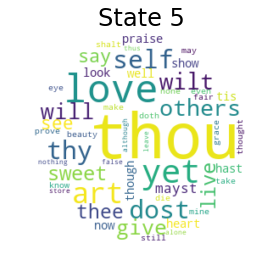

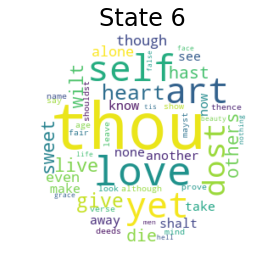

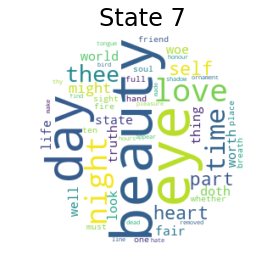

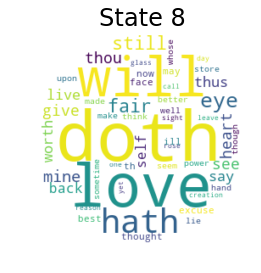

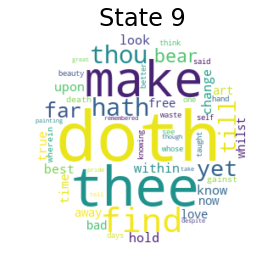

In [118]:
wordclouds = states_to_wordclouds(hmm_50, obs_map_sonnet)

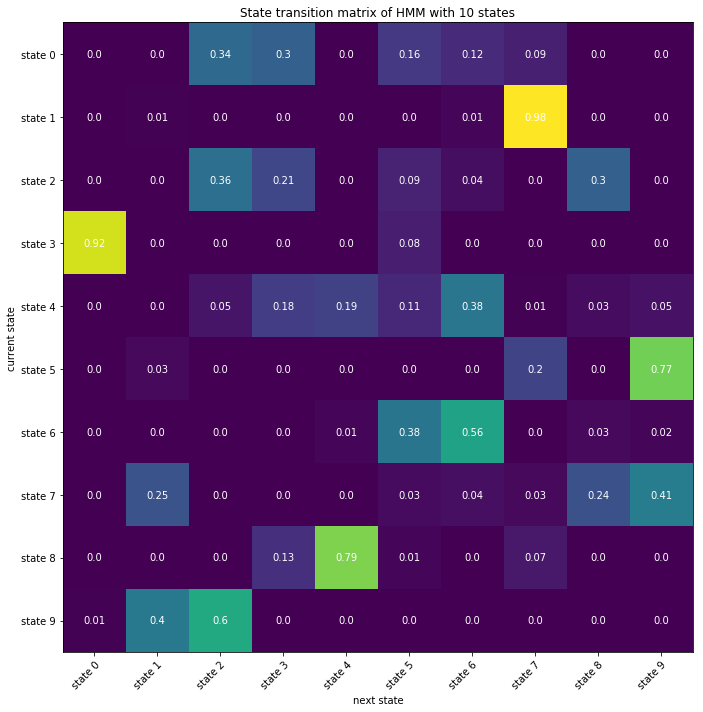

In [119]:
visualize_A(hmm_50.A)

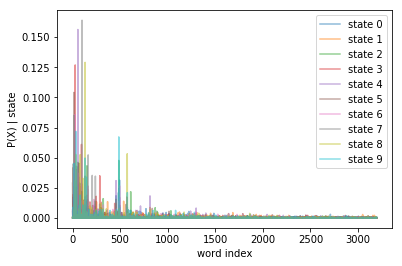

In [120]:
visualize_O(hmm_50.O)

How incorporate structure (14 lines), rhyme scheme, and iambic pentameter into HMM? 

### rhyme scheme 

In [145]:
obs_all, obs_map_all = parse_observations(text)

In [225]:
obs_all[0]

[0]

In [226]:
# create an array of rhyme pairs (using text with all 14 line sonnets, still parsed by line, not sonnet)

rhyme_list = []

for ind, line in enumerate(obs_all): 
    if len(line)==1: 
        
        first_rhyme = [obs_all[ind+1][-1], obs_all[ind+3][-1]]
        rhyme_list.append(first_rhyme)
        
        second_rhyme = [obs_all[ind+2][-1], obs_all[ind+4][-1]]
        rhyme_list.append(second_rhyme)
        
        third_rhyme = [obs_all[ind+5][-1], obs_all[ind+7][-1]]
        rhyme_list.append(third_rhyme)
        
        fourth_rhyme = [obs_all[ind+6][-1], obs_all[ind+8][-1]]
        rhyme_list.append(fourth_rhyme)
        
        fifth_rhyme = [obs_all[ind+9][-1], obs_all[ind+11][-1]]
        rhyme_list.append(fifth_rhyme)
        
        sixth_rhyme = [obs_all[ind+10][-1], obs_all[ind+12][-1]]
        rhyme_list.append(sixth_rhyme)
        
        seventh_rhyme = [obs_all[ind+13][-1], obs_all[ind+14][-1]]
        rhyme_list.append(seventh_rhyme)
                

In [227]:
def generate_rhyming_emissions(self, M, rhyme_list):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random. 

        Arguments:
            M:          Length of the emission to generate.

        Returns:
            emission:   The randomly generated emission as a list.

            states:     The randomly generated states as a list.
        '''

        emission_1 = []
        states_1 = []
        emission_2 = []
        states_2 = []

        # start state randomly
#         states.append(np.random.choice(self.L))
#         emission.append(np.random.choice(self.D, p=self.O[states[0]]))

        # pick random index of rhyme pair
        rhyme_ind = np.random.choice(len(rhyme_list))
        rhyme_one = rhyme_list[rhyme_ind][0]
        rhyme_two = rhyme_list[rhyme_ind][1]
        
        # emission 1
        
        # seed with first rhyme
        emission_1.append(rhyme_one)
        # pick most likely state to generate seeded word
        states_1.append(np.argmax(np.array(hmm.O)[:,rhyme_one]))
        
        # now loop over
        for i in range(M-1):
            states_1.append(np.random.choice(self.L, p=self.A[states_1[i]]))
            emission_1.append(np.random.choice(self.D, p=self.O[states_1[i]]))
            
        # emission 2
        
        # seed with first rhyme
        emission_2.append(rhyme_two)
        # pick most likely state to generate seeded word
        states_2.append(np.argmax(np.array(hmm.O)[:,rhyme_two]))
        
        # now loop over
        for i in range(M-1):
            states_2.append(np.random.choice(self.L, p=self.A[states_2[i]]))
            emission_2.append(np.random.choice(self.D, p=self.O[states_2[i]]))
        

        return emission_1, emission_2, states_1, states_2

In [263]:
def sample_rhyming_sonnet(hmm, obs_map,rhyme_list):
    # Get reverse map.
    
    obs_map_r = obs_map_reverser(obs_map)
    
#     emission, states = hmm.generate_emission(n_words)
    
    # generate 7 rhyming pairs 
    for i in range(3):
        e1, e3, s1, s3 = generate_rhyming_emissions(hmm, 8, rhyme_list)
        e2, e4, s2, s4 = generate_rhyming_emissions(hmm, 8, rhyme_list)
        
        # reverse (want rhyme at the end)
        e1.reverse()
        e2.reverse()
        e3.reverse()
        e4.reverse()
        
        stanza_1 = [obs_map_r[k] for k in e1]
        print(' '.join(stanza_1))
        
        stanza_2 = [obs_map_r[k] for k in e2]
        print(' '.join(stanza_2))
        
        stanza_3 = [obs_map_r[k] for k in e3]
        print(' '.join(stanza_3))
        
        stanza_4 = [obs_map_r[k] for k in e4]
        print(' '.join(stanza_4))
        
        
    # generate last pair 
    
    e13, e14, s13, s14 = generate_rhyming_emissions(hmm, 8, rhyme_list)
    e13.reverse()
    e14.reverse()
    
    stanza_13 = [obs_map_r[k] for k in e13]
    print(' '.join(stanza_13))
    
    stanza_14 = [obs_map_r[k] for k in e14]
    print(' '.join(stanza_14))
    

In [264]:
sample_rhyming_sonnet(hmm, obs_map_all, rhyme_list)

change lies warm mind compounded subsist as can
edge tillage new filed cherish dispatch forty respect
57 leave flower straying unbless thee tattered man
evil lie war gainst compound recompense child effect
tires change gazed as oerworn farewell feedst face
remembrance another die wantonness profitless poisoned die wit
limits tillage stormy expiate contracted quality natures disgrace
him mind proud wail dead but folly sit
endeared feedst else live love age might were
contracted bestow happier each gainst waste decease verse
proud waste thriftless stops releasing anon stormy bear
interest instinct favourites war compounded region usury disperse
respect virtuous brings pleasing confess no profitless infection
saint feedst waste by oersways seconds perforce correction


In [265]:
sample_rhyming_sonnet(hmm_50, obs_map_all, rhyme_list)

memory else waste ten an outgoing look is
contracted fester hence so minutes shifting thriftless end
shame sits flame gracious hell tattered impart amiss
cheered adore tattered injury shady pain evident fiend
happier gentle kept 1 cruel travelled flame best
memory bring note so acceptable after change show
sunken tattered as car as engrafted die suppressed
gainst feedst autumn adore leave feedst vial owe
executor gainst might loan cruel change contracted slave
as increase anticipate as another sense nursed grows
sad strengths takes stormy swiftfooted flame whom crave
throned lines grow shall distilled some as shows
as tattered natures waste another else more life
therein well desperate laid decease die rebel strife


In [268]:
sample_rhyming_sonnet(hmm_50, obs_map_all, rhyme_list)

prime trimmed alone are contracted cruel go will
waste waste subject flame gainst unbless achieve maintain
gracious feedst likeness strange kept as lively still
wisdom rage changes on newfound leave 22 reign
most without unbless bark truetelling ornament says me
will today to grave men liker mind night
fortunes say mine tattered receivest succeeding needs thee
but glutton profitless happier increase unbless increase sight
light exceeded invention blunt perceivst another betwixt hours
balmy feedst new weakness phoenix cheered seconds approve
bravry waste ornament else warm decease astonished showers
else mine 1 famine glutton ornament change love
contracted waste another seeking naming graciously back name
grave gainst asked manner famine termed 20 fame


## add in additional text (combine spenser and shakespeare)

In [121]:
spenser_text = open(os.path.join(os.getcwd(), 'data/spenser.txt')).read()
# obs_spens, obs_map_spens = parse_observations(spenser_text)

In [ ]:
# need to combine with shakespeare 
# need to find way to split up the lines (now separated by roman numerals)

In [127]:
# # if using roman numerals as sequences 

spenser_shake_text = spenser_text + text

In [128]:
obs_both, obs_map_both = parse_observations_af(spenser_shake_text)

In [17]:
# just spens
obs_spens, obs_map_spens = parse_observations_af(spenser_text)

In [ ]:
# obs_map_spens;

In [ ]:
# sonnets_both = turn_obs_sonnets_w_num(obs_both)

In [18]:
hmm_spens = unsupervised_HMM(obs_spens, 10, 5)
print('Sample Sonnet of Spencer texts:\n====================')


sample_sonnet(hmm_spens, obs_map_spens, n_words=112)

favor ever be heaven amongst she enlarge lines
and in make day by sight trophies honor
subtle doff his deign and the heavens and
fly praises may liberty in how soon much
that that reighneth to afflicted late she which
assoyle their will toil those of in spray
the is to not mourn comfort cleared myself
inspired with he feeds and year ready lxxiii
framd forth the that of seek and what
by shows manifold own yet on now desolate
the v they sweet her seem is arrive
sport lay doth love loves sense glory take
approach hope for then hope conquest your beams
lay you but of discord true had die


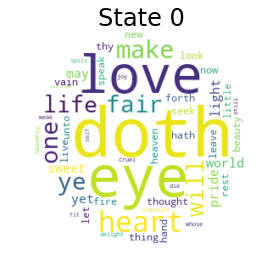

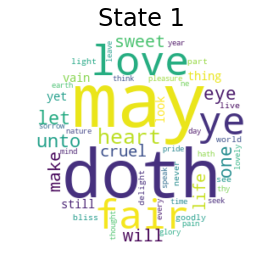

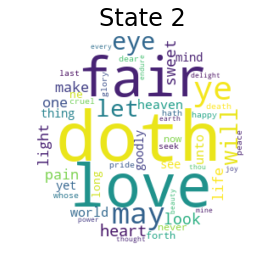

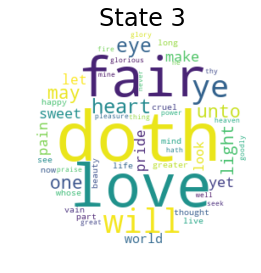

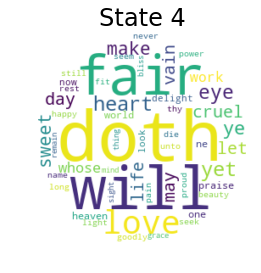

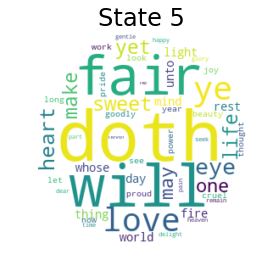

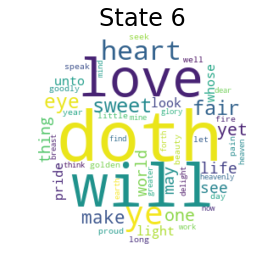

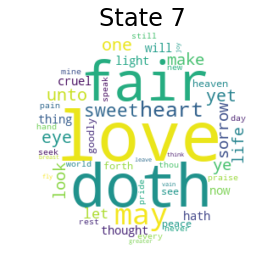

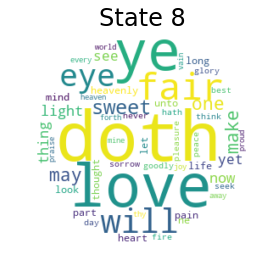

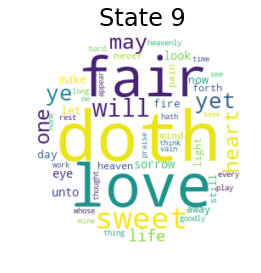

In [19]:
wordclouds = states_to_wordclouds(hmm_spens, obs_map_spens)

In [129]:
hmm_both = unsupervised_HMM(obs_both, 10, 5)
print('Sample Sonnet of Shakespeare and Spencer texts:\n====================')


sample_sonnet(hmm_both, obs_map_both, n_words=112)

IndexError: list index out of range

In [132]:
len(obs_both)

1073